In [57]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.graph_objs as go
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def euclidean(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def load_model(name="data/text5-AC-MODEL-4000"):
    load_data = open(name).read().split('\n')
    model2json = {}
    for i in load_data:
        if i:
            sp = i.replace('[','').replace(']','').split(" ")
            model2json[sp[0]] = np.array([float(x) for x in sp[1:]])
    return model2json

Extract data/text5-AC-MODEL-4000.tar.gz and run the following section to load the model


In [58]:
model = load_model()
words = []
vectors = []
for i in model:
    if model[i].size > 0:
        words.append(i)
        vectors.append(model[i])
pca = PCA(n_components=2).fit_transform(vectors)

scatter

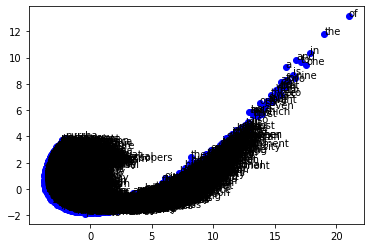

In [87]:
plt.scatter(pca[:,0],pca[:,1],linewidths=1,color='blue')
for i,w in enumerate(words):
    plt.annotate(w,xy=(pca[i][0],pca[i][1]))
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


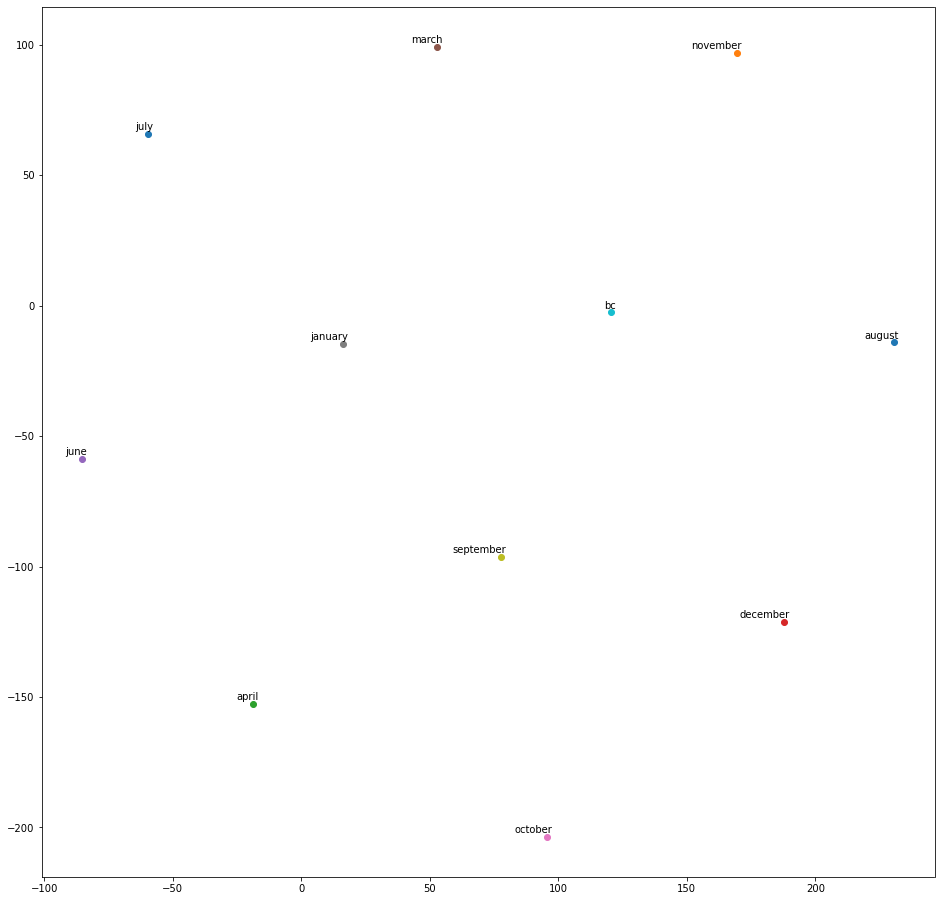

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


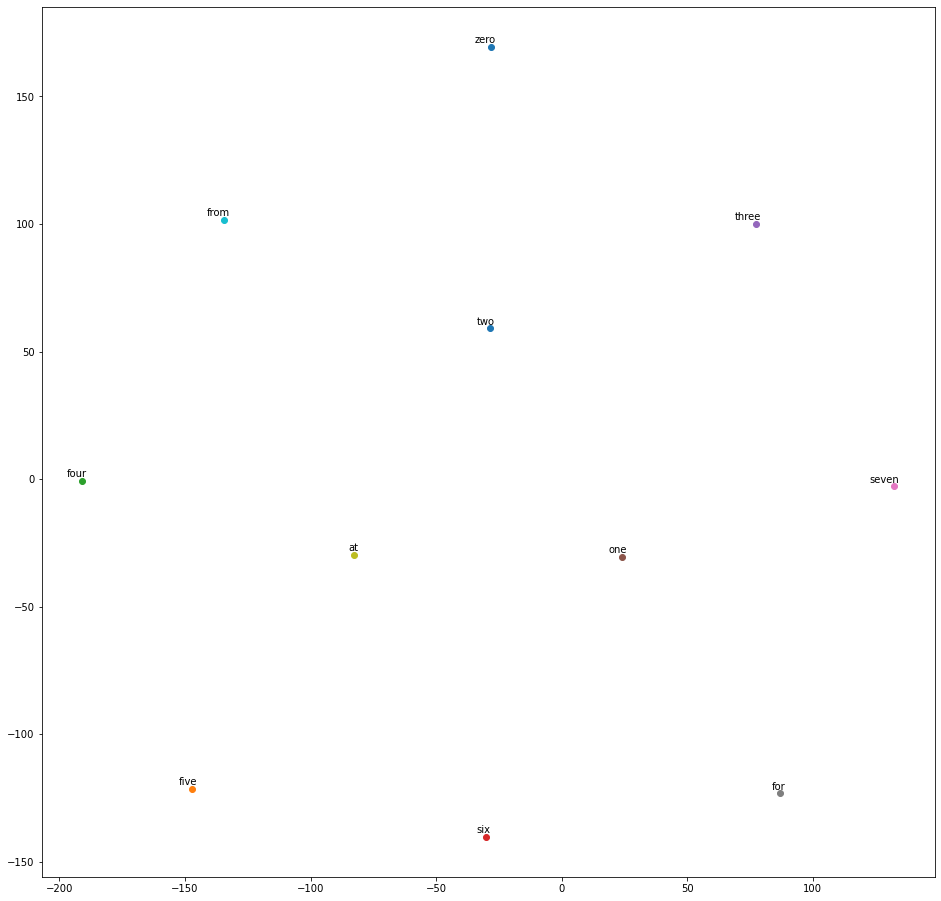

In [59]:
# returns a list of similar words to the given word. Sorted by their similarity
def most_similar_words(word, nofw:"Number of most similar words"):
    sample = model[word]
    sims = {}
    for i in model:
        if i != word:
            sims[euclidean(sample, model[i])] = i
    return [sims[x] for x in sorted(sims.keys())[:nofw]] + [word]

def tsne_plot3(model, words):
    labels = []
    tokens = []
    for word in words:
        if len(model[word]) != 0:
            tokens.append(model[word])
            labels.append(word)
#     labels = labels[:200]
#     tokens = tokens[:200]
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
tsne_plot3(model, most_similar_words('august', 10))
tsne_plot3(model, most_similar_words('two', 10))

In [60]:
model['there']

array([7.23945621, 7.33107562, 7.32727927, 7.38377055, 7.25986119,
       7.27018203, 7.28599711, 7.19576789, 7.33054529, 7.318745  ,
       7.26397898, 7.26523096, 7.29426213, 7.21273746, 7.25284754,
       7.22902685, 7.28584129, 7.3495967 , 7.38601474, 7.27704623,
       7.09058223, 7.22972721, 7.25533478, 7.20743704, 7.24438347,
       7.29367349, 7.25632159, 7.29656151, 7.34907219, 7.26362566,
       7.35257216, 7.31684128, 7.2299567 , 7.33265878, 7.24710951,
       7.26741705, 7.25849182, 7.22409991, 7.26135277, 7.29963537,
       7.35033065, 7.28220717, 7.2571519 , 7.34611821, 7.27122287,
       7.28007066, 7.27829825, 7.22787802, 7.35902351, 7.30386827,
       7.31514349, 7.25354399, 7.1892926 , 7.36377234, 7.21401005,
       7.3700405 , 7.25717163, 7.2758884 , 7.31423558, 7.18703605,
       7.37544578, 7.23740988, 7.24281557, 7.30162347, 7.32560922,
       7.31096058, 7.32266009, 7.28398009, 7.27899945, 7.34885636,
       7.25736215, 7.21956491, 7.226827  , 7.31320202, 7.29977